## Playground with some EDA and misc uses

##### Column info

collaborative returns t/f
description returns text
take nothing from external_urls
followers['total'] is the int
nothing from href
id is the id
nothing from image
text from name
can get username from my query not from owner
['tracks']['total'] gives you number of tracks

tracks data frame
from tracks items ['added_at'] get the data time the track was added
from tracks items ['track'] get duration_ms as float
for artist in tracks items ['track']['artists'][0]['name'] get the first artist
from tracks items ['track'] get explicit as bool
from tracks items ['track'] get id as string
from tracks items ['track'] get name as string
from tracks items ['track'] get popularity as float (0-100)

In [1]:
# imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import utils

sns.set_context('paper')
sns.set_style('white')
sns.color_palette('muted')
%matplotlib inline

In [2]:
# Get the data
current_df = utils.make_working_df()
current_df.head()

,trk_added_at,art_name,trk_duration,explicit,trk_id,trk_name,pl_id,trk_popularity,artist_followers,artist_genre,...,pl_min_trkpop,pl_max_trkpop,pl_mean_trkpop,art_min_trkpop,art_max_trkpop,art_mean_trkpop,art_total_trks,art_class,user_pls_in_sample,pl_desc_chars
0,2013-09-30 16:12:24,Allgott & Villgott,119907.0,0.0,3aIptaHMnbIXRxPWKlqwc6,Klappa lamm,3ftsSOkyCsILZeAZYQr2jH,2.0,76.0,None,...,0.0,4.0,1.333333,0.0,6.0,1.764706,13,crap_factory,515,0
1,2013-10-05 15:22:13,Allgott & Villgott,67918.0,0.0,0rPBlDWP6wcfax63Vs8nAF,Hej på dej,3ftsSOkyCsILZeAZYQr2jH,4.0,76.0,None,...,0.0,4.0,1.333333,0.0,6.0,1.764706,13,crap_factory,515,0
2,2014-07-16 13:50:24,J Boog,217270.0,0.0,4RjHalDdUreXDJSJLo44lK,Sunshine Girl,35XFuuqgCvTYQARix7CFpm,53.0,103793.0,[polynesian pop],...,0.0,72.0,38.269231,0.0,58.0,38.419355,20,star,166,0
3,2014-07-06 09:12:01,Brennan Heart,222919.0,0.0,6A04TZRVZw8db1VsHeYOEx,Never Break Me - Toneshifterz Remix,0gGfciue2ZDCOG5uMv46gU,0.0,122496.0,[hardstyle],...,0.0,58.0,15.510000,0.0,47.0,11.272727,18,crap_factory,166,0
4,2012-06-29 11:53:52,Johnny Ray,153375.0,0.0,1k4p7c69Dkh2b7s813ooR8,"Yes Tonight, Josephine",6Tuex6CIDfZRyRtsmb5rwE,0.0,1281.0,None,...,0.0,0.0,0.000000,0.0,0.0,0.000000,1,garage_band,1731,0


In [3]:
len(current_df['pl_owner'].drop_duplicates())

846

In [4]:
len(current_df['pl_id'].drop_duplicates())

8183

In [3]:
# current_df[['track_name','artist','track_pop']].drop_duplicates().sort_values('track_pop',ascending=False)

In [4]:
# for row in current_df['']
# print(current_df.columns)
ad = current_df[['artist_id','artist','artist_followers','artist_pop','artist_genre']].drop_duplicates('artist_id'
                                                            ).sort_values('artist_pop',ascending=False)
ad.head()

,artist_id,artist,artist_followers,artist_pop,artist_genre
70,246dkjvS1zLTtiykXe5h60,Post Malone,1983963.0,100.0,"[pop rap, rap]"
9387,6LuN9FCkKOj5PcnpouEgny,Khalid,1106550.0,99.0,None
620,3TVXtAsR1Inumwj472S9r4,Drake,14093269.0,99.0,"[canadian pop, hip hop, pop rap, rap]"
1688,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,14150392.0,99.0,[pop]
360,1URnnhqYAYcrqrcwql10ft,21 Savage,2244008.0,98.0,"[dwn trap, rap, trap music]"


In [5]:
current_df['artist_genre'] = [g if type(g)==list else [] for g in current_df['artist_genre']]
bigdf = utils.explode_value(current_df,'artist_genre')

In [16]:
best_g = bigdf[['artist_genre','artist_pop']].groupby('artist_genre',as_index=False).mean().sort_values('artist_pop',ascending=False)

In [38]:
import matplotlib
font = {'size'   : 38,
       'weight':'normal'}

matplotlib.rc('font', **font)

/Users/paulblankley/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


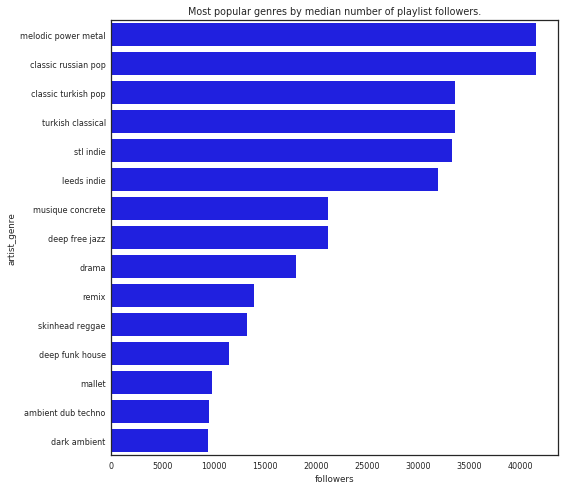

In [61]:
temp = bigdf[bigdf['track_pop']>100]
best_f = bigdf[['artist_genre','followers']].groupby('artist_genre',as_index=False).median().sort_values('followers',ascending=False)
print()
best_f = best_f.head(15)
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(data=best_f,y='artist_genre',x='followers',color='blue',ax=ax)
plt.title('Most popular genres by median number of playlist followers.')
plt.savefig('genre_followers')

/Users/paulblankley/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


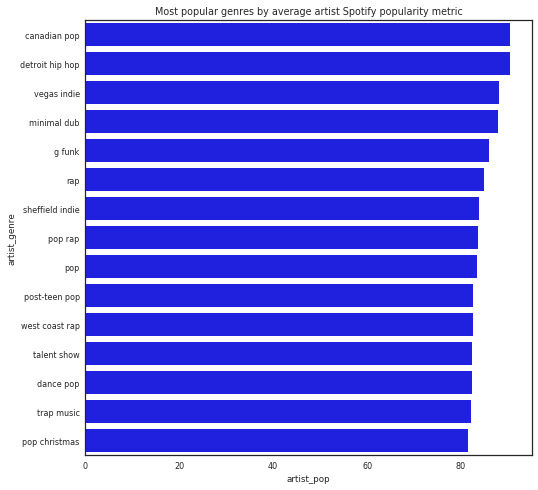

In [39]:
# sns.barplot(data=adf,y='artist_genre',x='artist_pop')
best_g = best_g.head(15)
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(data=best_g,y='artist_genre',x='artist_pop',color='blue',ax=ax)
plt.title('Most popular genres by average artist Spotify popularity metric')
plt.savefig('genre_pop')

In [15]:
adf = bigdf[bigdf['artist_genre'].isin(best_g)]
print(len(adf))
adf.head()

480040


,added_at,artist,artist_followers,artist_genre,artist_id,artist_pop,collab,desc,duration,explicit,followers,num_tracks,playlist_id,playlist_name,track_id,track_name,track_pop,user,user_followers
7,2014-08-04 16:09:48,Becky G,1450915.0,dance pop,4obzFoKoKRHIphyHzJ35G3,85.0,False,None,206166.0,0.0,43.0,26,5BASWniNjjZADnD9i96L45,LIL'BITCH,3DmW6y7wTEYHJZlLo1r6XJ,Shower,70.0,thomasaunier,3812.0
8,2014-08-04 16:09:48,Becky G,1450915.0,pop,4obzFoKoKRHIphyHzJ35G3,85.0,False,None,206166.0,0.0,43.0,26,5BASWniNjjZADnD9i96L45,LIL'BITCH,3DmW6y7wTEYHJZlLo1r6XJ,Shower,70.0,thomasaunier,3812.0
9,2014-08-04 16:09:48,Becky G,1450915.0,post-teen pop,4obzFoKoKRHIphyHzJ35G3,85.0,False,None,206166.0,0.0,43.0,26,5BASWniNjjZADnD9i96L45,LIL'BITCH,3DmW6y7wTEYHJZlLo1r6XJ,Shower,70.0,thomasaunier,3812.0
13,2013-08-03 17:10:52,Elton John,1191231.0,glam rock,3PhoLpVuITZKcymswpck5b,82.0,False,None,290680.0,0.0,0.0,31,6uSxJmUwlS3RqjGEA0TRq8,Elton John,1DqMnZpdOXy4mjmsXnFv2t,Circle Of Life,4.0,ellenholstad,254.0
31,2017-08-20 10:53:49,Tony! Toni! Toné!,197033.0,dance pop,7vWlb4pM85jCHvV771qZZW,61.0,False,All the hits that all Batang &#x27;90s loved l...,241466.0,0.0,7.0,127,0mEm0SZ7WsnI3w8ycnO6ue,The Fantastic '90s,0HsTJZWuj9vY7Ns0If1ARm,If I Had No Loot,37.0,1177637361,NaN


/Users/paulblankley/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


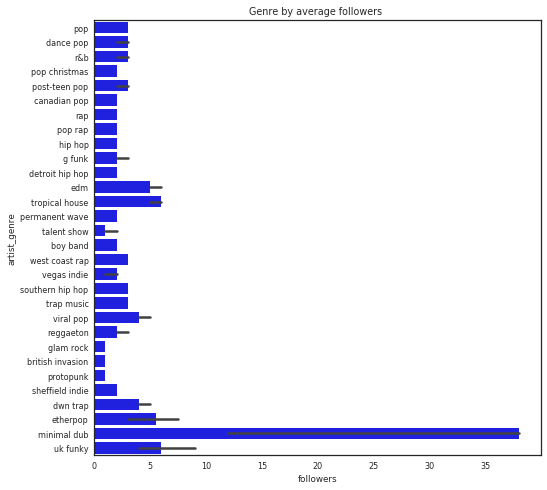

In [45]:
adf = adf.sort_values('artist_followers',ascending=False)
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(data=adf,y='artist_genre',x='followers',color='blue',estimator=np.median,ax=ax)
plt.title('Genre by average followers ')

## Possible outside Spotify datasources.

The sqlite database below is from the million song dataset people, and the txt file is also from them, but for a different project.

In [ ]:
# table of interest is songs

# Columns 
# 0|track_id|text|0||1
# 1|title|text|0||0
# 2|song_id|text|0||0
# 3|release|text|0||0
# 4|artist_id|text|0||0
# 5|artist_mbid|text|0||0
# 6|artist_name|text|0||0
# 7|duration|real|0||0
# 8|artist_familiarity|real|0||0
# 9|artist_hotttnesss|real|0||0
# 10|year|int|0||0
# 11|track_7digitalid|int|0||0
# 12|shs_perf|int|0||0
# 13|shs_work|int|0||0

# dpath = 'track_metadata.db'
# import sqlite3 
# db = sqlite3.connect(dpath)
# cursor = db.cursor()
# cursor.execute("select * from songs limit 5").fetchall()

In [ ]:
with open('data/msd_genre_dataset.txt', 'r') as file:
    txt = file.read().split('\n')[9:-1]
    
meta = [line.split(',') for line in txt]
mdf = pd.DataFrame(meta[1:],columns=meta[0])   


In [ ]:
mdf.head()

In [ ]:
print('there are ',len(mdf[mdf['title'].isin(current_df['track_name'])]),'matching rows for tracks in this data.')